<div align ="right">Thomas Jefferson University <b>COMP 103</b>: Intro to Visualization</div>

# Bar plots and Histograms

In this lesson we will talk about two types of graphs that appear superficially similar but that are in fact quite different from another: they have completely different purposes and are derived from very different underlying data sets. 

Histograms are charts used in descriptive statistics to show the **distribution** of a single variable. The bars represent ranges of the data and the heights of the bars represent the number or count of observations that fall within that range. A histogram shows how observations are distributed. The familiar **bell curve** is usually given as a histogram or a density plot (which is just a 'smoothed' version of a histogram).  

Bar plots are used to illustrate a comparison between groups or categories. Typically the bars represent the **mean** value of some variable as measured in different groups. The distribution of values is not shown by a bar plot, to make up for this we can add **error bars** to a bar plot in order to give some idea of how the data varies around the mean that is displayed.


## Working with layouts in matplotlib

Histograms are going to be relatively straighforward to construct. As our graphing needs get more precise, and as we want to include more information in our figures, we may want to have more control over graphs,  in particular finer control over the size of a figure, of the layouts of graphs relative to one another, and over the axes and bounding boxes. Matplotlib can easily control all of these things, but we will need to use a slightly different setup. Before, we simply created an object by calling the matplotlib function directly, for example:


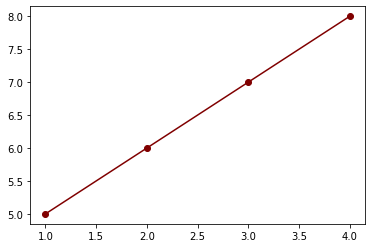

In [1]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4],[5,6,7,8], marker = 'o', color = 'maroon')
plt.show()

Another way to create the same graph is to first assign the figure itself to a `figure` object and then create an `axes` object (both were created invisibly for us when we use the methods we have used up until now) and assign variable names (`fig` and `ax`, which could be any names) to them. Assigning names allows them to be manipulated using methods that are specific to these object types. That last sentence may be confusing, so let's look at an example. 

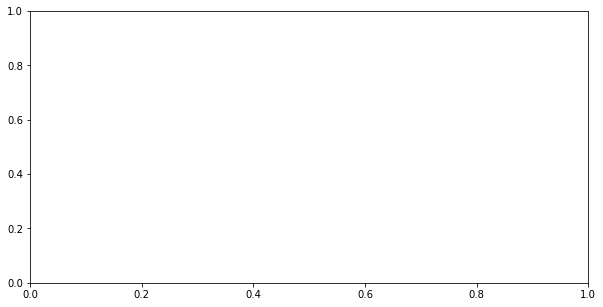

In [10]:
fig = plt.figure(figsize=(10,5))  # creates a figure object named fig to hold overall figure, within this we 
                                    ##can set things like overall figure size in inches: figsize(x,y)
ax = plt.axes()            # creates a separate names object ax to hold axes, allows for certain mods
plt.show()


Try running the code above again while commenting out first the first and then the second line. What is it showing you here? Can you figure out the difference? 
When the first line is commented  out the code still shoes a graph but without the figure size. However, wihtout the second line there are no axes defined therefore there is no figure produced, it only has a size.

The `figure` object is the overall workspace, without a set of axes, it won't show anything. If we just create the `axes` object

Now let's try combining what we have done, and adding something that we can't do without using the axes object (`ax`).

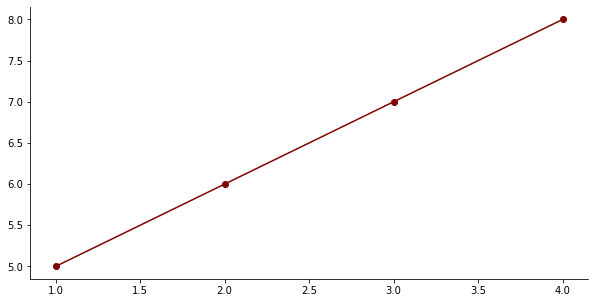

In [13]:
fig = plt.figure(figsize=(10,5))
ax = plt.axes() 

plt.plot([1,2,3,4],[5,6,7,8], marker = 'o', color = 'maroon')
#ax.plot([1,2,3,4],[5,6,7,8], marker = 'o', color = 'maroon')   # we can also call .plt as a method of the axes object
                                                                ## try commenting out the line above and uncommenting
                                                                ## this one

ax.spines['right'].set_visible(False)                           # .spines is a method for manipulating an axes object
ax.spines['top'].set_visible(False)                             ## I think this code is fairly self explanatory. There
                                                                ## are many many controls like this for refining graphs
        
        
plt.show()

Another formatting thing we might want to do is to create a figure that is made of multiple plots. The <a href = 'https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html'>subplot</a> (go to this link and scroll all the way down to find lots of examples) functionality is what we will use to do this. There are a many many ways to get the right results here. Some of them are more compact in terms of code, some of them are better for when you are trying to automate things. A brief and useful guide to the basics can be found here: <a href = 'https://medium.com/towards-artificial-intelligence/day-2-of-matplotlib-how-to-fit-multiple-subplots-in-the-same-window-c964f49ee503'>part1</a>, <a href = 'https://medium.com/towards-artificial-intelligence/day-3-of-matplotlib-figure-axes-explained-in-detail-d6e98f7cd4e7'>part2</a>.


I'm going to first show you a way that I think is the most straighforward to interpret, and then show you the way that I think matches better with how people usually do it (which I think will help you intepret other code examples you find on the internet).

So let's say we want to combine two line graphs in to a single plot. Let's say we want the overall figure to be square, but split into two halves. 

We can use subplot to do this. Subplot takes several arguments, the most importatn of which is an address for the plot of the form (row,column,item).



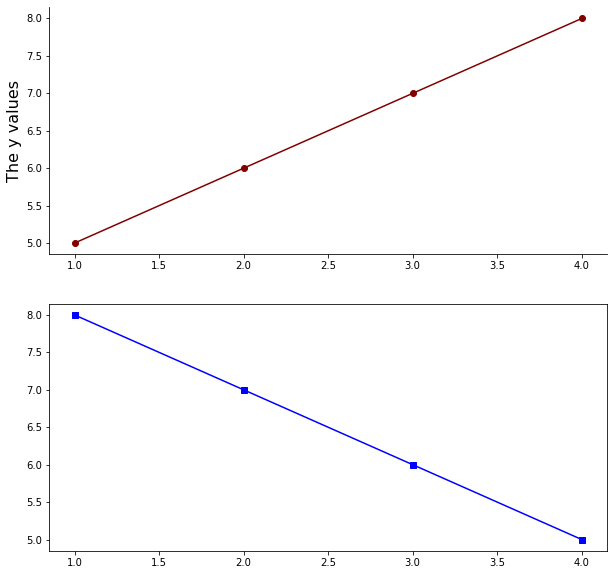

In [23]:
fig = plt.figure(figsize=(10,10))   # set up a 10 X 10 space for the figure

ax1 = plt.subplot(2,1,1)            # subplot is closely related to the 'axes' method, it can take its place
                                    ## here we are, within our figure, creating a subplot (axes) that assumes 2 rows
                                    ## a column, and our plot is going to be placed in the first subdivision
                                

plt.plot([1,2,3,4],[5,6,7,8], marker = 'o', color = 'maroon')    # since ax1 is the active plot, these commands go to ax1
plt.ylabel('The y values', size = 16)                            # note I adjusted font size

ax2 = plt.subplot(2,1,2)                                         # now create new axes at 2 rows, 1 column, 2nd item
plt.plot([1,2,3,4],[8,7,6,5], marker = 's', color = 'blue')      # subsequent commands are run in this second space


ax1.spines['right'].set_visible(False)                           # if we call specifically to each axis (ax1 here), we can 
ax1.spines['top'].set_visible(False)                             ## use the names we have assigned to do further
                                                                 ## manipulation of each subplot independently
plt.show()




We can use this method to create any combination of plots we want, in all kinds of interesting combinations. See if you can figure out this code and predict what it will make:

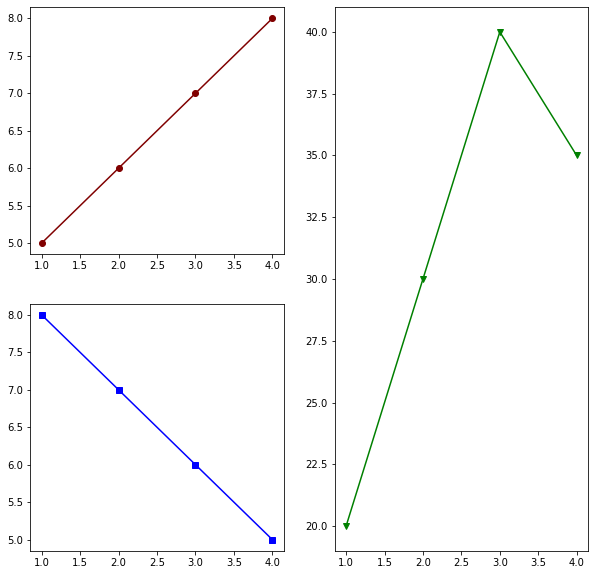

In [25]:
fig = plt.figure(figsize=(10,10))   

ax1 = plt.subplot(2,2,1)                                    
plt.plot([1,2,3,4],[5,6,7,8], marker = 'o', color = 'maroon')                          

ax2 = plt.subplot(2,2,3)                                
plt.plot([1,2,3,4],[8,7,6,5], marker = 's', color = 'blue') 

ax3 = plt.subplot(2,2,(2,4))                               
plt.plot([1,2,3,4],[20,30,40,35], marker = 'v', color = 'green') 

plt.show()



**Question to Answer:** From the example above, what can you infer about how numeric values in subplot are assigned to the different areas of the figure?

- The third number on the line ax2 = plt.subplot(2,2,3), in this case 3, determines the placement of the sub plot in the designated area of the figures which is why the (2,4) places it in the second and the fourth subdivision.
- It seems like the designated areas are numbered in a quadrant in which the top left is 1 and the bottom right is 4.

The more advanced method for creating a multipanel graph is below and uses the form:
```
fig, ax = plt.subplots(rows, columns, figsize = (width, height), sharex = True, sharey = False)
```

Note that we are defining the figure and axes in a single line (I don't totally understand why that works). 

There are several parameters for subplots, `sharex` and `sharey` shown here ask whether figures should use a common axis. 

Note that we have used `subplots` not `subplot` to define a row by column grid of subplots. Rather than the simple left to right numbering we used above we now get access to the different areas within the grid by treating `ax` as a matrix of different plot areas. This matrix has a 0 index to the topmost left subplot is `ax[0,0]` and the bottommost right subplot is `ax[rows-1, columns-1`]. If there is a single row or column, counting upwards from `ax[0]` to `ax[n]` moves you from top to bottom or left to right. 

Try to follow the examples below:

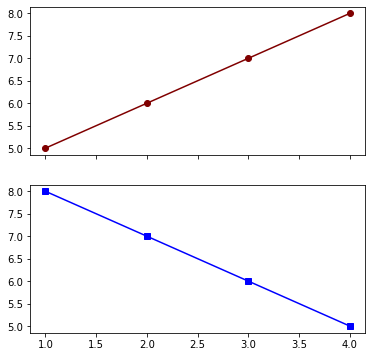

In [30]:
fig, ax = plt.subplots(2,1, figsize=(6,6), sharex = True)   

ax[0].plot([1,2,3,4],[5,6,7,8], marker = 'o', color = 'maroon')                          

ax[1].plot([1,2,3,4],[8,7,6,5], marker = 's', color = 'blue') 

plt.show()

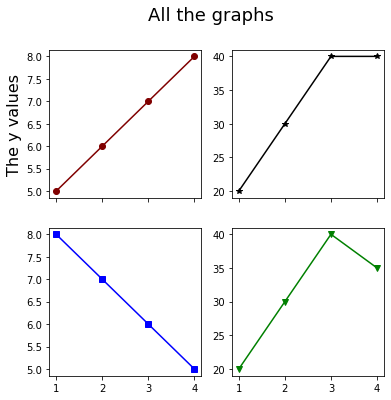

In [35]:
fig, ax = plt.subplots(2,2, figsize=(6,6), sharex = True)         # try adding sharey = True to see what happens
# when sharey is true then the graphs will share the y values (0-40) for all four graphs

ax[0,0].plot([1,2,3,4],[5,6,7,8], marker = 'o', color = 'maroon')                          

ax[0,0].set_ylabel('The y values', size = 16)                        # note two things here. First, the second combination
#plt.ylabel('The y values', size = 16)                               ## no longer works - because we 'plotted' all the subplots
                                                                     ## in one go, we can no longer use the approach
                                                                     ## above in which we add info to the 'active' plot
                                                                     ## This approach also requires us to use different commands
                                                                     ## note that we have to use `set_ylabel` when applying
                                                                     ## attributes directly to the ax[] objects 
ax[1,0].plot([1,2,3,4],[8,7,6,5], marker = 's', color = 'blue') 

ax[0,1].plot([1,2,3,4],[20,30,40,40], marker = '*', color = 'black') 
 
ax[1,1].plot([1,2,3,4],[20,30,40,35], marker = 'v', color = 'green')    

fig.suptitle('All the graphs', size =18)                              # This handy command makes an overall title 
                                                                      ## for the whole figure

plt.show()

## Constructing a histogram

Histograms are used to describe the distribution of univariate data. Therefore, there are two main inputs to a histogram - a set of values to be plotted and some information about how finely divided you want the bins (bars) of the histogram to be. The y axis on a histogram will always be count data - the number of observations within each category, so we specify x. 

There are two major to set the number of bins in histogram. The first is to set the number of bars, and let maplotlip distribute those evenly across the range of the data. The other way is to give an array-like object. This will treat the values in the array as the x-value for the left edge of each bin, except for the final value which will be the right edge of the final bin. Note that if you set the bins this way it is possible to unintentionally exclude data!

If you are dealing with integer data, this can lead to some funny results. For real data, specifying an appropriate number of bins will probably be sufficient. 

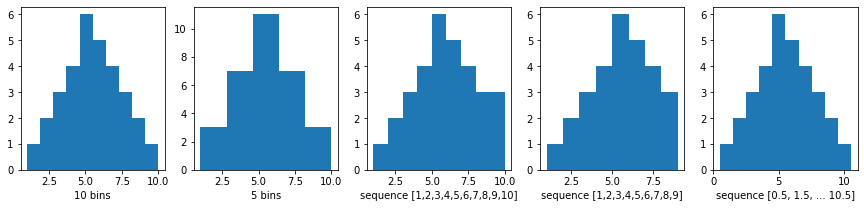

In [36]:
fig = plt.figure(figsize=(15,3))  

x = [1,2,2,3,3,3,4,4,4,4,5,5,5,5,5,5,6,6,6,6,6,7,7,7,7,8,8,8,9,9,10]

plt.subplot(1,5,1)
plt.hist(x,10)
plt.xlabel('10 bins')

plt.subplot(1,5,2)
plt.hist(x,5)
plt.xlabel('5 bins')

plt.subplot(1,5,3)
plt.hist(x,[1,2,3,4,5,6,7,8,9,10])
plt.xlabel('sequence [1,2,3,4,5,6,7,8,9,10]')   #the nine and 10 values end up in the same bin!

plt.subplot(1,5,4)
plt.hist(x,[1,2,3,4,5,6,7,8,9,9])
plt.xlabel('sequence [1,2,3,4,5,6,7,8,9]')      #the 10 value is excluded!

plt.subplot(1,5,5)
plt.hist(x,[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5])  #this looks ok
plt.xlabel('sequence [0.5, 1.5, ... 10.5]')      


plt.show()

Here's an example in which we clean it up a little with the rwidth, density, and color parameters. 

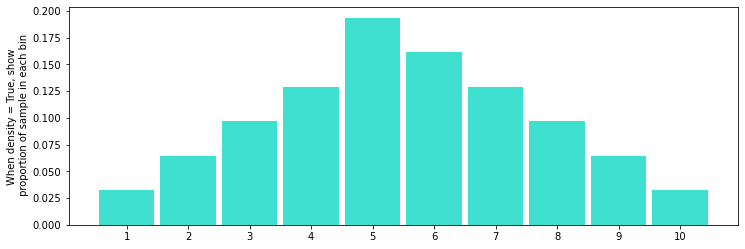

In [37]:
fig = plt.figure(figsize=(12,4))  
x = [1,2,2,3,3,3,4,4,4,4,5,5,5,5,5,5,6,6,6,6,6,7,7,7,7,8,8,8,9,9,10]
plt.hist(x,[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5], rwidth =0.9, density = True, color = 'turquoise')

plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.ylabel('When density = True, show\n proportion of sample in each bin')

plt.show()

**Assignment 1** In the code window below create a histogram. In the data folder you will find a dataset called histologists.csv. This data shows the ages of individuals attending a histology conference. Read this data into a data frame and use it to create a pair of histograms, plotted as subplots in the same figure, that shows the age distribution of the attendees in two different years. Using any and all of the techniques we have discussed so far, make it as attractive and well-labelled as possible.

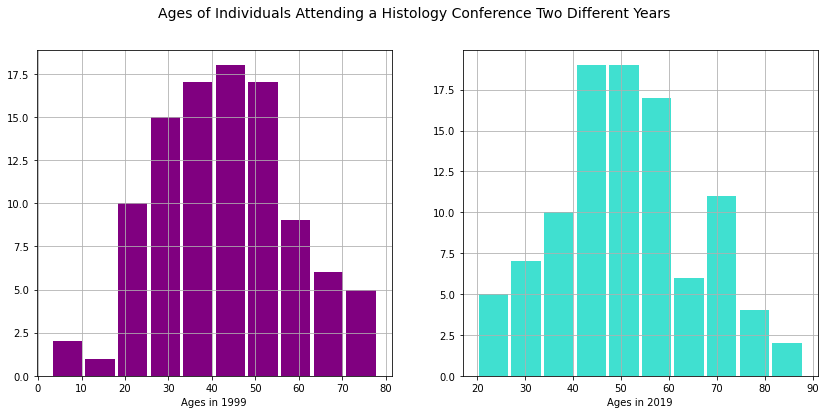

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(14,6))  
histo_data_df = pd.read_csv('histologists.csv')

plt.subplot(1,2,1)
plt.hist(histo_data_df['AGE_1999'], rwidth =0.9, color = 'purple')
plt.xlabel('Ages in 1999')
plt.grid()

plt.subplot(1,2,2)
plt.hist(histo_data_df['AGE_2019'], rwidth =0.9, color = 'turquoise')
plt.xlabel('Ages in 2019')
plt.grid()

fig.suptitle('Ages of Individuals Attending a Histology Conference Two Different Years', size =14)
plt.show()

## Building a bar plot
In contrast to a histogram, bar plots display means and averages. Unlike a histogram where we can just dump the data set in and let matplot sort it out, to create a bar plot from raw data we will first need to summarize the data in a data. That's because in the barplot command we need to give it the data to build the plot, specifically the x-positions and heights of the bars, and optionally data for error bars if we wish. I like to think about doing this in multiple steps. In the first we define the data we are going to use. Note that the first positions correspond to one another.

```
x = [1,2,3,4,5]                          # the positions on the x axis, this is 
y = [12,14,8,9,8]                        # the heights of the bars corresponding to each position
error =[1.1,0.9,1.3,1.5,1.6]             # the size of the error bar for each bar                                                                   
xticks_lab = ['the','names','of', 'the','categories']  # the label for each bar
```
And then the second step is adding that data to the graph:
```
plt.bar(x, y, yerr=error) # plots the bars at the x positions and 
plt.xticks(x, xticks_lab) 
```

A good way to make the data for our graph is to store the data in a dataframe where each row contains an the label, the bar height, and the associated error term. This is probably the trickiest part of making a bar graph. So let's work through a simple example:

In [37]:
import pandas as pd

plant_dict = {
    
    'name' : ['elm', 'maple','oak','ash','pine','grass','lily','daisy','banana','corn'],
    'habit': ['tree','tree','tree','tree','tree','herb','herb','herb','herb','herb'], 
    'height': [24,31,32,23,31,0.5,1,0.23,5,2]
}
plant_df = pd.DataFrame(plant_dict)
plant_df

,name,habit,height
0,elm,tree,24.00
1,maple,tree,31.00
2,oak,tree,32.00
3,ash,tree,23.00
4,pine,tree,31.00
5,grass,herb,0.50
6,lily,herb,1.00
7,daisy,herb,0.23
8,banana,herb,5.00
9,corn,herb,2.00


In [38]:
plant_plotdata = plant_df.groupby(["habit"])["height"].describe()
plant_plotdata

,count,mean,std,min,25%,50%,75%,max
habit,,,,,,,,
herb,5.0,1.746,1.940381,0.23,0.5,1.0,2.0,5.0
tree,5.0,28.200,4.324350,23.00,24.0,31.0,31.0,32.0


Now we can just access the values by calling our new dataframe!



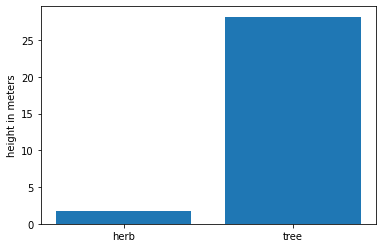

In [39]:
x = [1,2]                           

y = plant_plotdata["mean"]
xticks_lab = plant_plotdata.index   # since we created a data frame in which the index is based on habit
                                    ## we can't call habit as a column, we have to call the index itself to
                                    ## get the categories as labels 

plt.bar(x, y)
plt.xticks(x, xticks_lab) 
plt.ylabel('height in meters')

plt.show()


## Adding error bars

Finally, we can add error bars with a very simple bit of code that assigns the values we want to use for the error bars to the parameter `yerr`. Other things you might want to adjust are `alpha`, which controls the transparency of the bars, and thus will make the error bars more visible, `ecolor` which controls the error bar color, and `capsize` which controls the width of the error bars. 

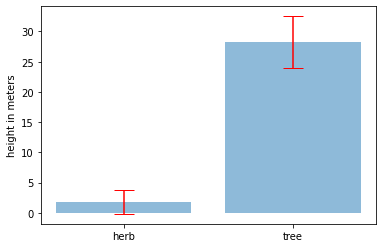

In [64]:
x = [1,2]                           

y = plant_plotdata['mean']
error = plant_plotdata['std']       # since standard deviation is the error we get from .describe() we'll use that
xticks_lab = plant_plotdata.index   # since we created a data frame in which the index is based on habit
                                    ## we can't call habit as a column, we have to call the index itself to
                                    ## get the categories as labels 

plt.bar(x, y, yerr = error, alpha = 0.5, capsize =10, ecolor = 'red')
plt.xticks(x, xticks_lab) 
plt.ylabel('height in meters')
plt.show()

**Assignment** There is a database in the data folder called bars.csv. It shows the number of beers on taps at different bars (most but not all of which are imaginary), which are then also categorized by the type of bar. Create a combination graph that consists of two elements - a histogram showing the distribution of numbers of beers on tap for all of the bar graph that compares the different categories of bars in the data set with a bar plot with error bars. Make the graphs look as nice as you can. 

<Figure size 1008x288 with 0 Axes>

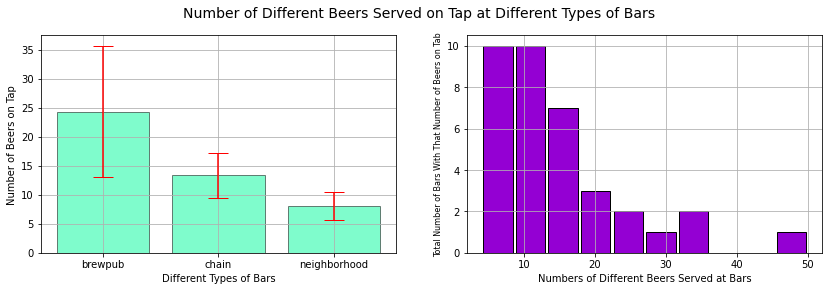

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(14,4))  

bar_data_df = pd.read_csv('bars.csv')
beer_dict = {
    
    'Bar Names' : histo_data_df['Bar'],
    'Type of Beer': histo_data_df['Type'], 
    'Number of Beers on Tap': histo_data_df['Beers_on_Tap']
}
beer_df = pd.DataFrame(beer_dict)
beer_df

beer_plotdata = beer_df.groupby(["Type of Beer"])['Number of Beers on Tap'].describe()
beer_plotdata

x = [1,2,3]                         
y = beer_plotdata['mean']
error = beer_plotdata['std']       
xticks_lab = beer_plotdata.index   

fig = plt.figure(figsize=(14,4))  
plt.subplot(1,2,1)
plt.bar(x, y, yerr = error, alpha = 0.5, capsize =10, ecolor = 'red', edgecolor = 'black', color = 'mediumspringgreen')
plt.xticks(x, xticks_lab) 
plt.xlabel('Different Types of Bars')
plt.ylabel('Number of Beers on Tap')
plt.grid()

bars_data_df = pd.read_csv('bars.csv')

plt.subplot(1,2,2)
plt.hist(bars_data_df['Beers_on_Tap'], edgecolor = 'black', rwidth =0.9, color = 'darkviolet')
plt.xlabel('Numbers of Different Beers Served at Bars')
plt.ylabel('Total Number of Bars With That Number of Beers on Tab', size = 8)
plt.grid()

fig.suptitle('Number of Different Beers Served on Tap at Different Types of Bars', size =14)
plt.show()


In [125]:
#not to toot my own horn but i think i did this right which rarely happens
#toot toot
#if this isnt right thats very awkward
fig.savefig('bars.pdf')
fig.savefig('bars.jpeg')
fig.savefig('bars.ps')
fig.savefig('bars.raw')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [126]:
fig.savefig('bars.jpeg', dpi = 300)

## Exporting a figure

Because we are working with a figure item (which we have called `fig`) it's remarkably easy to export a graph once we have created it. The graphs we see within the jupyter notebook are just .png file renderings of the graphs we have created. They don't look very nice. But if we specify a format we can export our figures in many different image formats. Even better, we don't have to use a special command for this. All we have to do to export a figure is use the command: 
```
fig.savefig('file_name.file_extension'). 
```
The extension we give (.ps, .eps, .png, .jpg, .raw, .pdf, .tif) will determine the file format we get. Other parameters can be found at the <a href = 'https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html'>savefig definition</a>.

So what file format should you use? I like to export figures in a vector format. In vector formats, such as .ps, .eps, or .pdf, images and text can be scaled up without losing resolution, and fonts and text can be subsequently manipulated using a tool such as Adobe Illustrator. However sometimes an image file is simpler to deal with or useful for the application you are looking for. So my default is to export to .pdf, but you should experiment. Image files that are too small, or in compressed formats such as .jpg, can show serious degradation to text and graph elements.

Here's a graph I made with my daughter about her 'special subjects' at school:

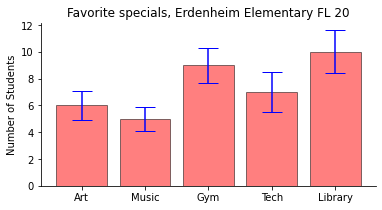

In [117]:
fig = plt.figure(figsize=(6,3))
ax = plt.axes()                    

x = [1,2,3,4,5]
y = [6,5,9,7,10]
error =[1.1,0.9,1.3,1.5,1.6]                                     #this is made up data, obviously                                              
xticks_lab = ['Art','Music','Gym', 'Tech','Library']

plt.bar(x,y, color = 'red', edgecolor = 'black', yerr=error, align='center', alpha=0.5, ecolor='blue', capsize=10)
plt.xticks(x, xticks_lab) 

plt.ylabel('Number of Students')
plt.title('Favorite specials, Erdenheim Elementary FL 20')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.savefig('specials.pdf')  # if figure name contains extension it automatically picks that format

plt.show()

**Question to Answer:** Take the combo graph histogram that you made for the bars.csv data and export the file in a number of different file types. Below, tell me what you notice about the resulting files. Try changing the overall figure size as well. Is there a difference in what you see? Feel free to try more things with .savefig and tell me about those as well.   

- I didn't have all of the applications to open all the files (raw and ps), but the jpeg and the pdf gave me a pretty good quality file of the graphs.
- I think the pdf was higher quality than the intial export of the jpeg file.
- The jpeg file had better quality once I added the dpi = 300.

![Alt text that will appear on mouseover](images/TJU_logo_dummy_image.png "Dummy image")